In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [79]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [80]:
train_generator = train_datagen.flow_from_directory('dataset/train',target_size=(150, 150),class_mode='categorical')
val_generator = val_datagen.flow_from_directory('dataset/validation',target_size=(150, 150),class_mode='categorical')
test_generator = test_datagen.flow_from_directory('dataset/test',target_size=(150, 150),class_mode='categorical')

Found 1360 images belonging to 15 classes.
Found 1360 images belonging to 15 classes.
Found 1360 images belonging to 15 classes.


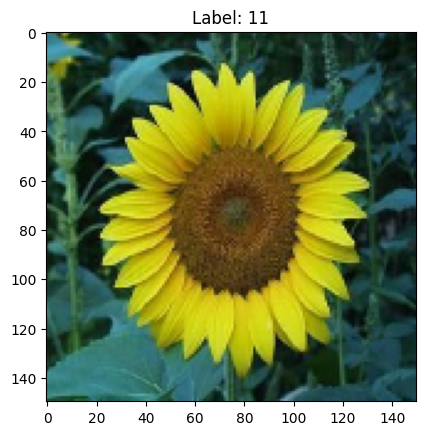

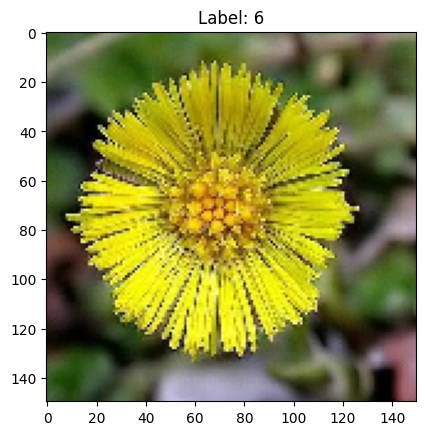

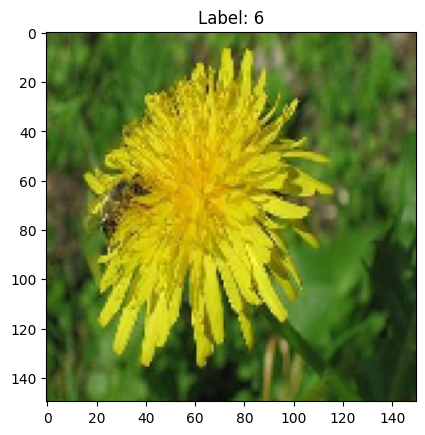

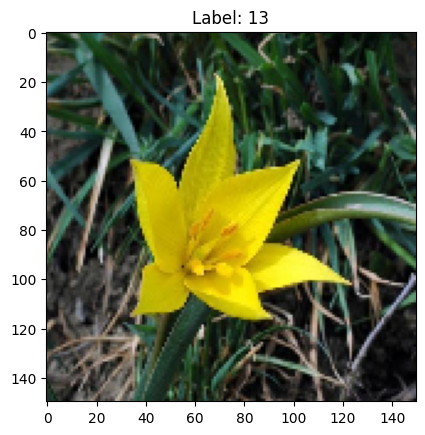

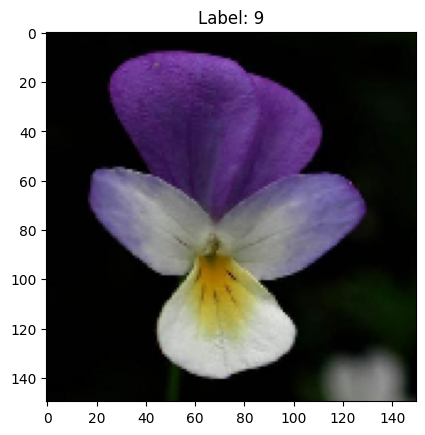

In [81]:
import matplotlib.pyplot as plt
import numpy as np
images, labels = next(train_generator)
for i in range(5):
    plt.imshow(images[i])
    plt.title(f"Label: {np.argmax(labels[i])}")
    plt.show()

In [82]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [83]:
num_classes = train_generator.num_classes
model = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(150,150,3)),  
  MaxPool2D(),Flatten(),                                                                                             
  Dense(num_classes, activation='softmax')                            
])

In [84]:
model.compile('adam', 'categorical_crossentropy',metrics=['accuracy'])             

In [ ]:
model.fit(train_generator, validation_data=val_generator, epochs=3) 

Epoch 1/3
43/43 [==============================] - 30s 672ms/step - loss: 6.2409 - accuracy: 0.2390 - val_loss: 1.7010 - val_accuracy: 0.5743
Epoch 2/3
43/43 [==============================] - ETA: 0s - loss: 1.2225 - accuracy: 0.6515

In [58]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

43/43 [==============================] - 9s 199ms/step - loss: 0.2707 - accuracy: 0.9632
Test accuracy: 0.9632353186607361
